# Proyecto No.2 Data Science

Este notebook realiza el preprocesamiento y análisis exploratorio (EDA) de los datos del Mitsui & Co. Commodity Prediction Challenge. Se revisan las series de precios de commodities e índices (train.csv), limpiando valores faltantes, transformando datos y explorando distribuciones, volatilidad y correlaciones. El fin es comprender la estructura de los datos y preparar la información antes de aplicar modelos predictivos.

## Serie de precios de los activos

## Carga y preprocesamiento de datos

En los siguientes bloques de cóodigo se quitaron los duplicados Posteriormente se llenaron los datos nulos con el promedio de cada columna Es decir, si hay un dato faltante para la columna del precio de Oro en JPX Se obtuvo su promedio con los datos que habían en la columna y luego este valor se coloco en las celdas faltantes. Posteriormente se eliminaron columnas redundantes, se considero alta correlacion si entre las columnas había una correlacion arrba de 0.85 Finalmente se obtuvo el conjunto listo para el análisis exploratorio que se ha llamado data Este ultimo conjunto de datos se usará para el modelado de la serie temporal

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
import pandas as pd
import numpy as np

In [1]:
import pandas as pd   # Librería para manejar tablas (DataFrames)
df = pd.read_csv("train.csv") # Datos crudos: series de precios de los activos (una columna por activo).
df

,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
0,0,2264.5,7205.0,2570.0,3349.0,NaN,NaN,NaN,NaN,NaN,...,1.699987,0.776874,0.888115,0.689954,0.066653,0.090582,0.119630,0.078135,13.822740,0.059163
1,1,2228.0,7147.0,2579.0,3327.0,NaN,NaN,NaN,NaN,NaN,...,1.695279,0.778682,0.889488,0.692628,0.067354,0.091297,0.120520,0.079066,13.888146,0.059895
2,2,2250.0,7188.5,2587.0,3362.0,4684.0,4691.0,4684.0,3363.0,3367.0,...,1.692724,0.780186,0.894004,0.697490,0.067394,0.091478,0.120809,0.079287,13.983675,0.060037
3,3,2202.5,7121.0,2540.0,3354.0,4728.0,4737.0,4729.0,3430.0,3426.0,...,1.683111,0.785329,0.889439,0.698502,0.067639,0.091558,0.121021,0.079285,14.035571,0.059983
4,4,2175.0,7125.0,2604.0,3386.0,NaN,NaN,NaN,NaN,NaN,...,1.684816,0.787264,0.891042,0.701485,0.067443,0.091266,0.121055,0.078925,14.013760,0.059503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,1956,2629.5,9778.5,2010.0,2818.5,16041.0,16183.0,16046.0,6076.0,6073.0,...,1.842075,0.584336,0.819066,0.478610,0.048581,0.073181,0.078771,0.045312,14.606239,0.042097
1957,1957,2646.5,9860.0,2014.5,2838.5,NaN,NaN,NaN,NaN,NaN,...,1.844791,0.583610,0.816264,0.476380,0.048547,0.072941,0.078532,0.045315,14.502889,0.042089
1958,1958,2658.5,9919.5,2011.0,2860.0,16132.5,16261.0,16134.0,6200.0,6200.0,...,1.839538,0.583402,0.816093,0.476110,0.048495,0.073421,0.078794,0.045184,14.580416,0.042103
1959,1959,2651.0,9930.5,2032.0,2862.0,16214.5,16341.0,16211.0,6175.0,6195.0,...,1.847106,0.582341,0.822465,0.478955,0.048457,0.072909,0.078424,0.045193,14.492839,0.042015


In [2]:
print("Tipos de datos en el dataset")
df.dtypes

Tipos de datos en el dataset


date_id           int64
LME_AH_Close    float64
LME_CA_Close    float64
LME_PB_Close    float64
LME_ZS_Close    float64
                 ...   
FX_NOKGBP       float64
FX_NOKCHF       float64
FX_ZARCHF       float64
FX_NOKJPY       float64
FX_ZARGBP       float64
Length: 558, dtype: object

In [3]:
df.isna().sum()

date_id          0
LME_AH_Close    51
LME_CA_Close    51
LME_PB_Close    51
LME_ZS_Close    51
                ..
FX_NOKGBP        0
FX_NOKCHF        0
FX_ZARCHF        0
FX_NOKJPY        0
FX_ZARGBP        0
Length: 558, dtype: int64

In [4]:
"""
Se decide llenar el data set con la media de cada columna ya que al retirar los datos faltantes
el dataset se reduce a casi 250 observaciones, lo cual es una pérdida significativa que impactaría en el modelado posterior
"""
df_filled = df.copy()
df_filled = df_filled.fillna(df.mean(numeric_only=True))
print(df_filled.isna().sum())
df_filled

date_id         0
LME_AH_Close    0
LME_CA_Close    0
LME_PB_Close    0
LME_ZS_Close    0
               ..
FX_NOKGBP       0
FX_NOKCHF       0
FX_ZARCHF       0
FX_NOKJPY       0
FX_ZARGBP       0
Length: 558, dtype: int64


,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
0,0,2264.5,7205.0,2570.0,3349.0,7693.877507,7758.334417,7694.050407,3792.407046,3793.64607,...,1.699987,0.776874,0.888115,0.689954,0.066653,0.090582,0.119630,0.078135,13.822740,0.059163
1,1,2228.0,7147.0,2579.0,3327.0,7693.877507,7758.334417,7694.050407,3792.407046,3793.64607,...,1.695279,0.778682,0.889488,0.692628,0.067354,0.091297,0.120520,0.079066,13.888146,0.059895
2,2,2250.0,7188.5,2587.0,3362.0,4684.000000,4691.000000,4684.000000,3363.000000,3367.00000,...,1.692724,0.780186,0.894004,0.697490,0.067394,0.091478,0.120809,0.079287,13.983675,0.060037
3,3,2202.5,7121.0,2540.0,3354.0,4728.000000,4737.000000,4729.000000,3430.000000,3426.00000,...,1.683111,0.785329,0.889439,0.698502,0.067639,0.091558,0.121021,0.079285,14.035571,0.059983
4,4,2175.0,7125.0,2604.0,3386.0,7693.877507,7758.334417,7694.050407,3792.407046,3793.64607,...,1.684816,0.787264,0.891042,0.701485,0.067443,0.091266,0.121055,0.078925,14.013760,0.059503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,1956,2629.5,9778.5,2010.0,2818.5,16041.000000,16183.000000,16046.000000,6076.000000,6073.00000,...,1.842075,0.584336,0.819066,0.478610,0.048581,0.073181,0.078771,0.045312,14.606239,0.042097
1957,1957,2646.5,9860.0,2014.5,2838.5,7693.877507,7758.334417,7694.050407,3792.407046,3793.64607,...,1.844791,0.583610,0.816264,0.476380,0.048547,0.072941,0.078532,0.045315,14.502889,0.042089
1958,1958,2658.5,9919.5,2011.0,2860.0,16132.500000,16261.000000,16134.000000,6200.000000,6200.00000,...,1.839538,0.583402,0.816093,0.476110,0.048495,0.073421,0.078794,0.045184,14.580416,0.042103
1959,1959,2651.0,9930.5,2032.0,2862.0,16214.500000,16341.000000,16211.000000,6175.000000,6195.00000,...,1.847106,0.582341,0.822465,0.478955,0.048457,0.072909,0.078424,0.045193,14.492839,0.042015


In [5]:
print("Cantidad duplicados")
print("Duplicados eliminados:", df_filled.duplicated().sum())

Cantidad duplicados
Duplicados eliminados: 0


In [6]:
"""
Ahora que ya tenemos un dataset limpio (sin nulos ni duplicados),
el siguiente paso es reducir la dimensionalidad eliminando variables redundantes.
Para ello calculamos la matriz de correlación absoluta entre todas las variables
y buscamos aquellas que tengan correlación superior a 0.8, ya que se consideran
altamente correlacionadas y por lo tanto aportan información muy similar.
Finalmente, eliminamos estas columnas redundantes de df_filled,
obteniendo un nuevo dataframe (df_reduced) más compacto, eficiente y con menor
riesgo de multicolinealidad, lo que facilitará tanto el análisis exploratorio
como la posterior construcción de modelos predictivos.
"""

# Se trabaja con df_filled ya que es el dataframe sin nulos ni duplicados
import numpy as np

corr_matrix = df_filled.corr().abs()
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
cols_to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
df_reduced = df_filled.drop(cols_to_drop, axis=1)
data = df_reduced.copy()
data = data.drop("date_id",axis=1)
data

,LME_AH_Close,LME_PB_Close,JPX_Gold_Mini_Futures_Volume,JPX_Gold_Rolling-Spot_Futures_Volume,JPX_Gold_Standard_Futures_Volume,JPX_Platinum_Mini_Futures_Volume,JPX_Platinum_Standard_Futures_Volume,JPX_RSS3_Rubber_Futures_Volume,JPX_Gold_Mini_Futures_open_interest,JPX_Gold_Rolling-Spot_Futures_open_interest,...,US_Stock_VTV_adj_volume,US_Stock_VXUS_adj_volume,US_Stock_VYM_adj_volume,US_Stock_WMB_adj_volume,US_Stock_WPM_adj_volume,US_Stock_X_adj_volume,US_Stock_XLB_adj_volume,FX_EURAUD,FX_AUDNZD,FX_EURCAD
0,2264.5,2570.0,5721.83794,6663.717615,27899.320325,975.99458,8623.97832,1965.642818,3786.026558,73768.673713,...,1925989.0,1937809.0,1534451.0,4480305.0,1918509.0,1.199470e+07,8979239.0,1.540368,1.103011,1.508946
1,2228.0,2579.0,5721.83794,6663.717615,27899.320325,975.99458,8623.97832,1965.642818,3786.026558,73768.673713,...,1236706.0,1391297.0,1170263.0,8969474.0,2899390.0,1.210980e+07,4952274.0,1.534906,1.104186,1.507524
2,2250.0,2587.0,2681.00000,37908.000000,30656.000000,624.00000,13713.00000,4128.000000,1768.000000,128380.000000,...,1501979.0,1298665.0,964661.0,7298642.0,2029410.0,9.990157e+06,4120092.0,1.535084,1.098776,1.507930
3,2202.5,2540.0,3523.00000,30791.000000,35267.000000,525.00000,17629.00000,4586.000000,2026.000000,128145.000000,...,1328483.0,1341229.0,1280244.0,6366688.0,2201174.0,1.232388e+07,4671998.0,1.527972,1.098275,1.492598
4,2175.0,2604.0,5721.83794,6663.717615,27899.320325,975.99458,8623.97832,1965.642818,3786.026558,73768.673713,...,1421356.0,1006768.0,1469662.0,5546048.0,3057977.0,1.137100e+07,4539115.0,1.525623,1.093475,1.486463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,2629.5,2010.0,5968.00000,1307.000000,21614.000000,642.00000,8170.00000,255.000000,3341.000000,41729.000000,...,3294001.0,3851587.0,1119771.0,7919252.0,1140937.0,1.172494e+07,6811899.0,1.786168,1.091048,1.596192
1957,2646.5,2014.5,5721.83794,6663.717615,27899.320325,975.99458,8623.97832,1965.642818,3786.026558,73768.673713,...,2097264.0,4320787.0,1151769.0,6889734.0,1529026.0,1.172494e+07,5315525.0,1.791509,1.093704,1.599372
1958,2658.5,2011.0,11875.00000,1767.000000,33544.000000,2241.00000,6897.00000,323.000000,3393.000000,41479.000000,...,2699670.0,3056042.0,1088104.0,5390566.0,3027641.0,1.172494e+07,6825474.0,1.791038,1.092632,1.597050
1959,2651.0,2032.0,10931.00000,1759.000000,32592.000000,643.00000,9512.00000,335.000000,3497.000000,41128.000000,...,2746323.0,4210134.0,839982.0,6757220.0,1973982.0,1.172494e+07,6747213.0,1.783354,1.091889,1.601524


# Inicio Análisis Exploratorio 

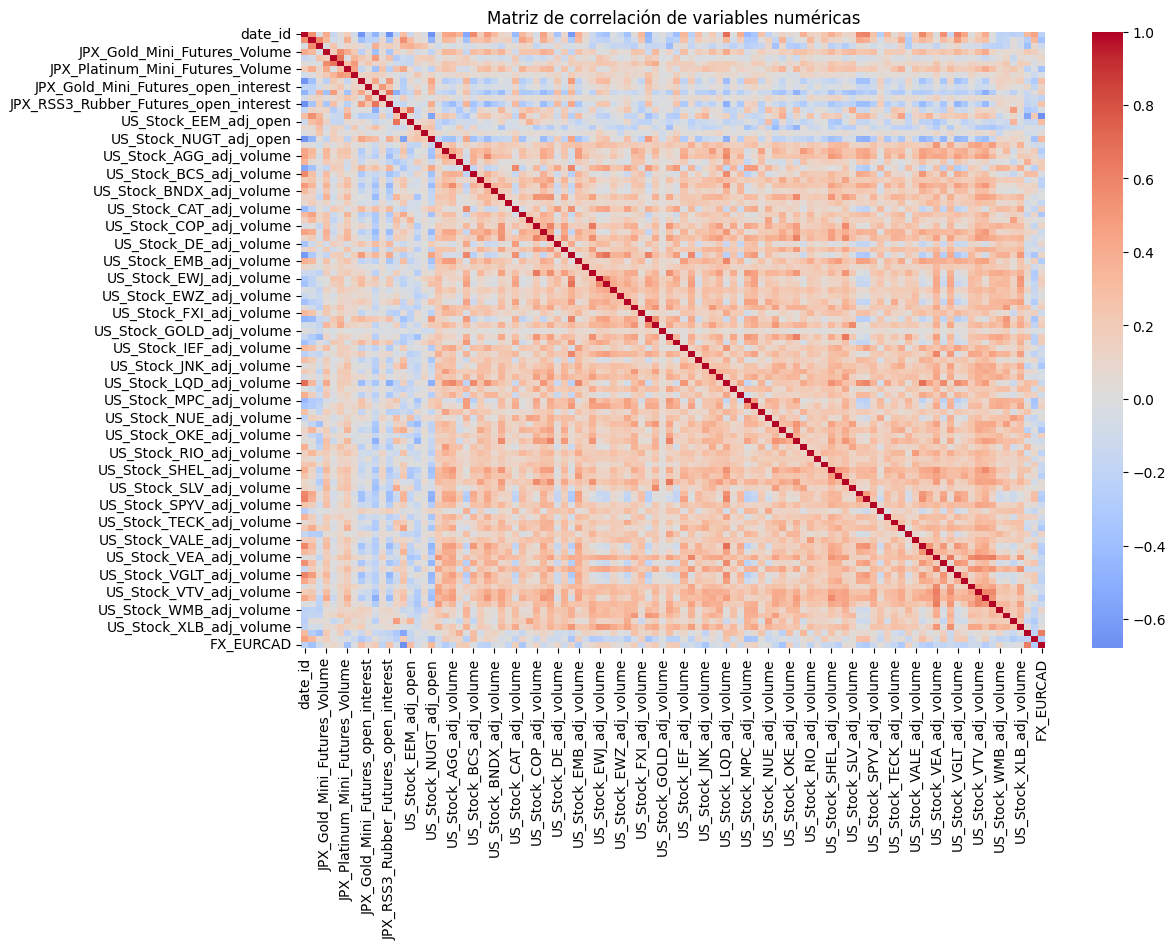

In [12]:
corr = df_reduced.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación de variables numéricas")
plt.show()

# Scatter ejemplo: precio vs volumen (ajusta nombres de columnas según dataset)
if "close" in df_reduced.columns and "volume" in df_reduced.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(df_reduced["close"], df_reduced["volume"], alpha=0.5)
    plt.xlabel("Precio de cierre")
    plt.ylabel("Volumen")
    plt.title("Precio vs Volumen")
    plt.show()

Outliers

In [14]:
from scipy import stats

# Calcular z-scores
z_scores = np.abs(stats.zscore(df_reduced.select_dtypes(include=np.number)))

# Contar outliers (valores con |z| > 3) por columna
outliers = (z_scores > 3).sum(axis=0)

# Convertir a Series con nombres de columnas
outliers = pd.Series(outliers, index=df_reduced.select_dtypes(include=np.number).columns)

# Mostrar top 10 variables con más outliers
print("Outliers detectados por variable:\n")
print(outliers.sort_values(ascending=False).head(10))


Outliers detectados por variable:

US_Stock_GOLD_adj_open                  58
JPX_Gold_Rolling-Spot_Futures_Volume    51
US_Stock_VEA_adj_volume                 47
JPX_Gold_Standard_Futures_Volume        44
US_Stock_CVX_adj_volume                 43
US_Stock_CLF_adj_volume                 43
US_Stock_TD_adj_volume                  43
US_Stock_VYM_adj_volume                 43
US_Stock_FNV_adj_volume                 42
US_Stock_ACWI_adj_volume                42
dtype: int64


Dado que el conjunto inicial de datos, a pesar de haber reducido la cantidad de variables siguientes siendo un montón Lo que se ha hecho es implementar el algoritmo Kmeans para separar las variables por grupos. De esa manera se reducía bastante las variables en cada grupo lo que facilita el análisis exploratorio.

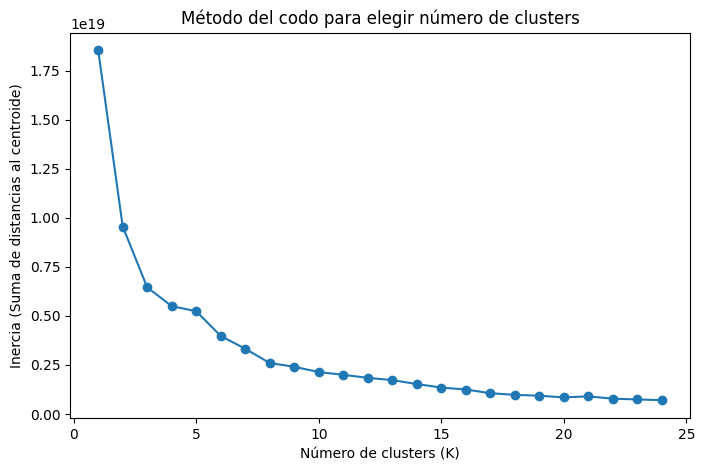

In [7]:
"""
La idea ahora es hacer que las variables estén en las filas
para poder aplicar Kmeans
y agrupar variables que se parecen entre sí en su evolucion temporal
"""
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

matriz = data.to_numpy()
matrizTranspuesta = matriz.T

# Lista para guardar las inercias
inertias = []

# Probar distintos valores de K
K_range = range(1, 25)  # de 1 a 10 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(matrizTranspuesta)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o')
plt.title("Método del codo para elegir número de clusters")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia (Suma de distancias al centroide)")
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

num_df = data.select_dtypes(include="number").copy()
colnames = num_df.columns

# 1) Matriz transpuesta: filas = variables, columnas = tiempo
matrizT = num_df.to_numpy().T

# 2) Estandarizar (muy importante para KMeans)
matrizT_scaled = StandardScaler().fit_transform(matrizT)

# 3) KMeans con K=6 (agrupa variables)
k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(matrizT_scaled)

# 4) Tabla variable → cluster
variable_clusters = pd.DataFrame({"variable": colnames, "cluster": labels}).sort_values("cluster")
variable_clusters

,variable,cluster
24,US_Stock_BKR_adj_volume,0
25,US_Stock_BND_adj_volume,0
20,US_Stock_AGG_adj_volume,0
27,US_Stock_BP_adj_volume,0
23,US_Stock_BCS_adj_volume,0
...,...,...
99,US_Stock_WPM_adj_volume,4
97,US_Stock_VYM_adj_volume,4
102,FX_EURAUD,4
103,FX_AUDNZD,4


In [9]:
print(variable_clusters["cluster"].value_counts().sort_index())

cluster
0    20
1     1
2    12
3     3
4    68
5     1
Name: count, dtype: int64


In [10]:
vars_cluster0 = variable_clusters.loc[variable_clusters["cluster"] == 0, "variable"].tolist()
vars_cluster1 = variable_clusters.loc[variable_clusters["cluster"] == 1, "variable"].tolist()
vars_cluster2 = variable_clusters.loc[variable_clusters["cluster"] == 2, "variable"].tolist()
vars_cluster3 = variable_clusters.loc[variable_clusters["cluster"] == 3, "variable"].tolist()
vars_cluster4 = variable_clusters.loc[variable_clusters["cluster"] == 4, "variable"].tolist()
vars_cluster5 = variable_clusters.loc[variable_clusters["cluster"] == 5, "variable"].tolist()

df0 = data[vars_cluster0].copy()
df1 = data[vars_cluster1].copy()
df2 = data[vars_cluster2].copy()
df3 = data[vars_cluster3].copy()
df4 = data[vars_cluster4].copy()
df5 = data[vars_cluster5].copy()

### Análisis Exploratorio Grupo 0

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def eda_cluster(df, cluster_num, corr_thresh=0.7):
    print(f"Análisis Exploratorio Grupo {cluster_num}")

    # Numéricas y categóricas
    num = df.select_dtypes(include=np.number).copy()
    cat = df.select_dtypes(include=['object', 'category']).copy()

    # Descriptivos
    print("\nEstadísticas descriptivas (numéricas):")
    desc = num.describe().T
    display(desc)

    # Faltantes
    print("\nValores faltantes por variable (todas):")
    miss = df.isnull().mean().mul(100).round(2).sort_values(ascending=False)
    display(miss[miss > 0])

    # Outliers por IQR
    print("\nOutliers por IQR")
    out_counts = {}
    for col in num.columns:
        s = num[col].dropna()
        if s.empty:
            out_counts[col] = 0
            continue
        q1, q3 = s.quantile([0.25, 0.75])
        iqr = q3 - q1
        if iqr == 0:
            out_counts[col] = 0
        else:
            lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
            out_counts[col] = int(((s < lower) | (s > upper)).sum())
    outliers_iqr = pd.Series(out_counts).sort_values(ascending=False)
    display(outliers_iqr.head(10))

    # Correlaciones altas
    print(f"\nCorrelaciones altas (|r| > {corr_thresh}):")
    high_corr = pd.DataFrame()
    if num.shape[1] > 1:
        corr = num.corr()
        mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
        corr_upper = corr.where(mask)
        high_corr = (
            corr_upper.stack().rename("corr").reset_index()
            .rename(columns={"level_0":"var1","level_1":"var2"})
            .assign(abs_corr=lambda d: d["corr"].abs())
            .query("abs_corr > @corr_thresh")
            .sort_values("abs_corr", ascending=False)
        )
        display(high_corr.head(20))
    else:
        print("(No hay suficientes variables numéricas para correlación.)")

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'EDA Cluster {cluster_num}')

    # Boxplots (top por varianza)
    if num.shape[1] > 0:
        cols_box = num.var().sort_values(ascending=False).head(min(12, num.shape[1])).index
        num[cols_box].boxplot(ax=axes[0,0], rot=90)
        axes[0,0].set_title('Boxplots (top por varianza)')
    else:
        axes[0,0].text(0.5,0.5,"Sin numéricas", ha='center')

    # Heatmap correlación
    if num.shape[1] > 1:
        cm = num.corr()
        sns.heatmap(cm, cmap='coolwarm', center=0,
                    annot=(num.shape[1] <= 12), fmt=".2f", ax=axes[0,1])
        axes[0,1].set_title('Matriz de correlación')
    else:
        axes[0,1].text(0.5,0.5,"Sin correlaciones", ha='center')

    # Histograma de una columna representativa (mayor varianza)
    if num.shape[1] > 0:
        rep = num.var().sort_values(ascending=False).index[0]
        axes[1,1].hist(num[rep].dropna(), bins=40)
        axes[1,1].set_title(f'Histograma: {rep}')
    else:
        axes[1,1].text(0.5,0.5,"Sin numéricas", ha='center')

    plt.tight_layout()
    plt.show()

    # Categóricas
    if cat.shape[1] > 0:
        for col in cat.columns:
            print(f"\nFrecuencias {col}:")
            display(cat[col].value_counts())
            cat[col].value_counts().plot(kind='bar', figsize=(6,3), title=f'Barplot {col}')
            plt.show()

    # Volatilidad promedio
    vol_prom = num.std(ddof=1).mean() if num.shape[1] > 0 else np.nan
    print(f"\nVolatilidad promedio (media de std por variable): {vol_prom:.6f}")

    return {"desc": desc, "missing_pct": miss, "outliers_iqr": outliers_iqr,
            "high_corr": high_corr, "vol_prom": vol_prom}


Análisis Exploratorio Grupo 0

Estadísticas descriptivas (numéricas):


,count,mean,std,min,25%,50%,75%,max
US_Stock_BKR_adj_volume,1961.0,7.167561e+06,4.281323e+06,958438.0,4748116.0,6510892.0,8438527.0,79090492.0
US_Stock_BND_adj_volume,1961.0,5.241654e+06,2.841465e+06,644471.0,3473338.0,4981493.0,6349599.0,33963335.0
US_Stock_AGG_adj_volume,1961.0,6.665400e+06,3.239024e+06,1324832.0,4465340.0,6243292.0,8162377.0,28390079.0
US_Stock_BP_adj_volume,1961.0,1.010052e+07,5.476147e+06,2348375.0,6550921.0,8930586.0,12180664.0,66996986.0
US_Stock_BCS_adj_volume,1961.0,7.581876e+06,7.028912e+06,827000.0,3185159.0,5605436.0,9867156.0,147611977.0
US_Stock_MPC_adj_volume,1961.0,5.350975e+06,3.225079e+06,965504.0,3156419.0,4775084.0,6556036.0,39153794.0
US_Stock_MS_adj_volume,1961.0,9.475343e+06,4.835788e+06,2087767.0,6412103.0,8414853.0,11007602.0,58533497.0
US_Stock_JNK_adj_volume,1961.0,7.011823e+06,4.279634e+06,661394.0,4066508.0,6178777.0,8680358.0,46175066.0
US_Stock_GLD_adj_volume,1961.0,8.626470e+06,4.588357e+06,1436508.0,5652091.0,7637880.0,10106940.0,47347678.0
US_Stock_IEF_adj_volume,1961.0,6.687539e+06,4.924899e+06,531238.0,3766926.0,5797640.0,8103627.0,68670638.0



Valores faltantes por variable (todas):


Series([], dtype: float64)


Outliers por IQR


US_Stock_COP_adj_volume    121
US_Stock_CVX_adj_volume    115
US_Stock_WMB_adj_volume    113
US_Stock_MS_adj_volume     111
US_Stock_EWJ_adj_volume    109
US_Stock_XLB_adj_volume    107
US_Stock_GLD_adj_volume    100
US_Stock_NEM_adj_volume     99
US_Stock_DVN_adj_volume     91
US_Stock_MPC_adj_volume     88
dtype: int64


Correlaciones altas (|r| > 0.7):


,var1,var2,corr,abs_corr


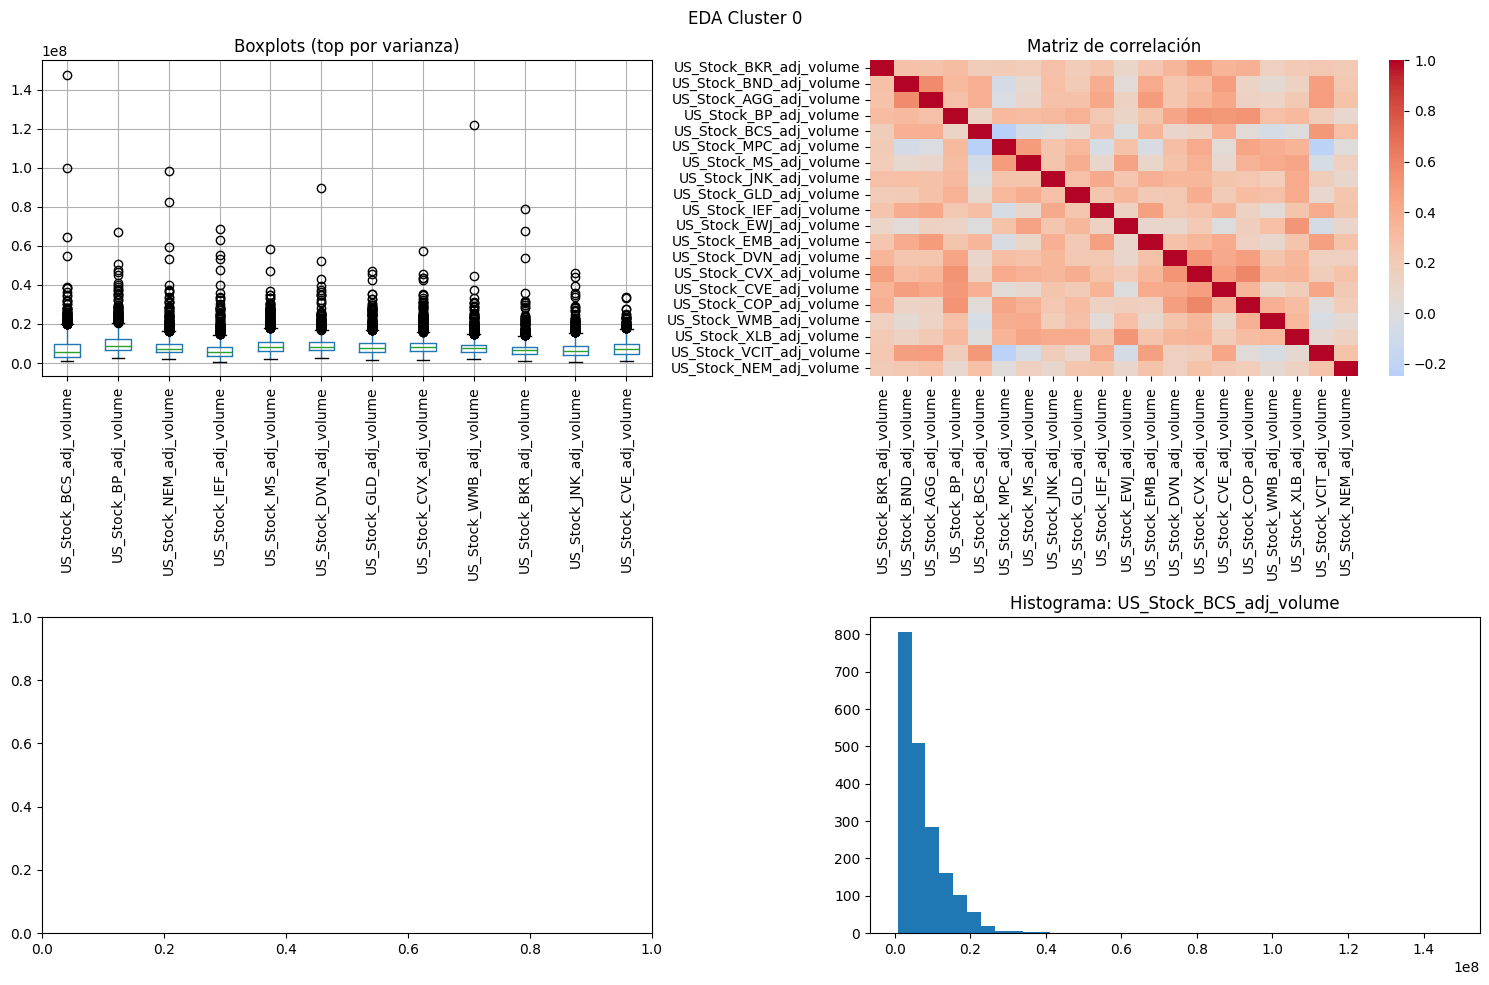


Volatilidad promedio (media de std por variable): 4243295.130858


{'desc':                            count          mean           std        min  \
 US_Stock_BKR_adj_volume   1961.0  7.167561e+06  4.281323e+06   958438.0   
 US_Stock_BND_adj_volume   1961.0  5.241654e+06  2.841465e+06   644471.0   
 US_Stock_AGG_adj_volume   1961.0  6.665400e+06  3.239024e+06  1324832.0   
 US_Stock_BP_adj_volume    1961.0  1.010052e+07  5.476147e+06  2348375.0   
 US_Stock_BCS_adj_volume   1961.0  7.581876e+06  7.028912e+06   827000.0   
 US_Stock_MPC_adj_volume   1961.0  5.350975e+06  3.225079e+06   965504.0   
 US_Stock_MS_adj_volume    1961.0  9.475343e+06  4.835788e+06  2087767.0   
 US_Stock_JNK_adj_volume   1961.0  7.011823e+06  4.279634e+06   661394.0   
 US_Stock_GLD_adj_volume   1961.0  8.626470e+06  4.588357e+06  1436508.0   
 US_Stock_IEF_adj_volume   1961.0  6.687539e+06  4.924899e+06   531238.0   
 US_Stock_EWJ_adj_volume   1961.0  6.992504e+06  3.884673e+06  1370435.0   
 US_Stock_EMB_adj_volume   1961.0  5.216754e+06  2.694054e+06   680069.0   
 US_

In [59]:
eda_cluster(df0, 0)

### Análisis Exploratorio Grupo 1

Análisis Exploratorio Grupo 1

Estadísticas descriptivas (numéricas):


,count,mean,std,min,25%,50%,75%,max
US_Stock_BKR_adj_volume,1961.0,7.167561e+06,4.281323e+06,958438.0,4748116.0,6510892.0,8438527.0,79090492.0
US_Stock_BND_adj_volume,1961.0,5.241654e+06,2.841465e+06,644471.0,3473338.0,4981493.0,6349599.0,33963335.0
US_Stock_AGG_adj_volume,1961.0,6.665400e+06,3.239024e+06,1324832.0,4465340.0,6243292.0,8162377.0,28390079.0
US_Stock_BP_adj_volume,1961.0,1.010052e+07,5.476147e+06,2348375.0,6550921.0,8930586.0,12180664.0,66996986.0
US_Stock_BCS_adj_volume,1961.0,7.581876e+06,7.028912e+06,827000.0,3185159.0,5605436.0,9867156.0,147611977.0
US_Stock_MPC_adj_volume,1961.0,5.350975e+06,3.225079e+06,965504.0,3156419.0,4775084.0,6556036.0,39153794.0
US_Stock_MS_adj_volume,1961.0,9.475343e+06,4.835788e+06,2087767.0,6412103.0,8414853.0,11007602.0,58533497.0
US_Stock_JNK_adj_volume,1961.0,7.011823e+06,4.279634e+06,661394.0,4066508.0,6178777.0,8680358.0,46175066.0
US_Stock_GLD_adj_volume,1961.0,8.626470e+06,4.588357e+06,1436508.0,5652091.0,7637880.0,10106940.0,47347678.0
US_Stock_IEF_adj_volume,1961.0,6.687539e+06,4.924899e+06,531238.0,3766926.0,5797640.0,8103627.0,68670638.0



Valores faltantes por variable (todas):


Series([], dtype: float64)


Outliers por IQR


US_Stock_COP_adj_volume    121
US_Stock_CVX_adj_volume    115
US_Stock_WMB_adj_volume    113
US_Stock_MS_adj_volume     111
US_Stock_EWJ_adj_volume    109
US_Stock_XLB_adj_volume    107
US_Stock_GLD_adj_volume    100
US_Stock_NEM_adj_volume     99
US_Stock_DVN_adj_volume     91
US_Stock_MPC_adj_volume     88
dtype: int64


Correlaciones altas (|r| > 0.7):


,var1,var2,corr,abs_corr


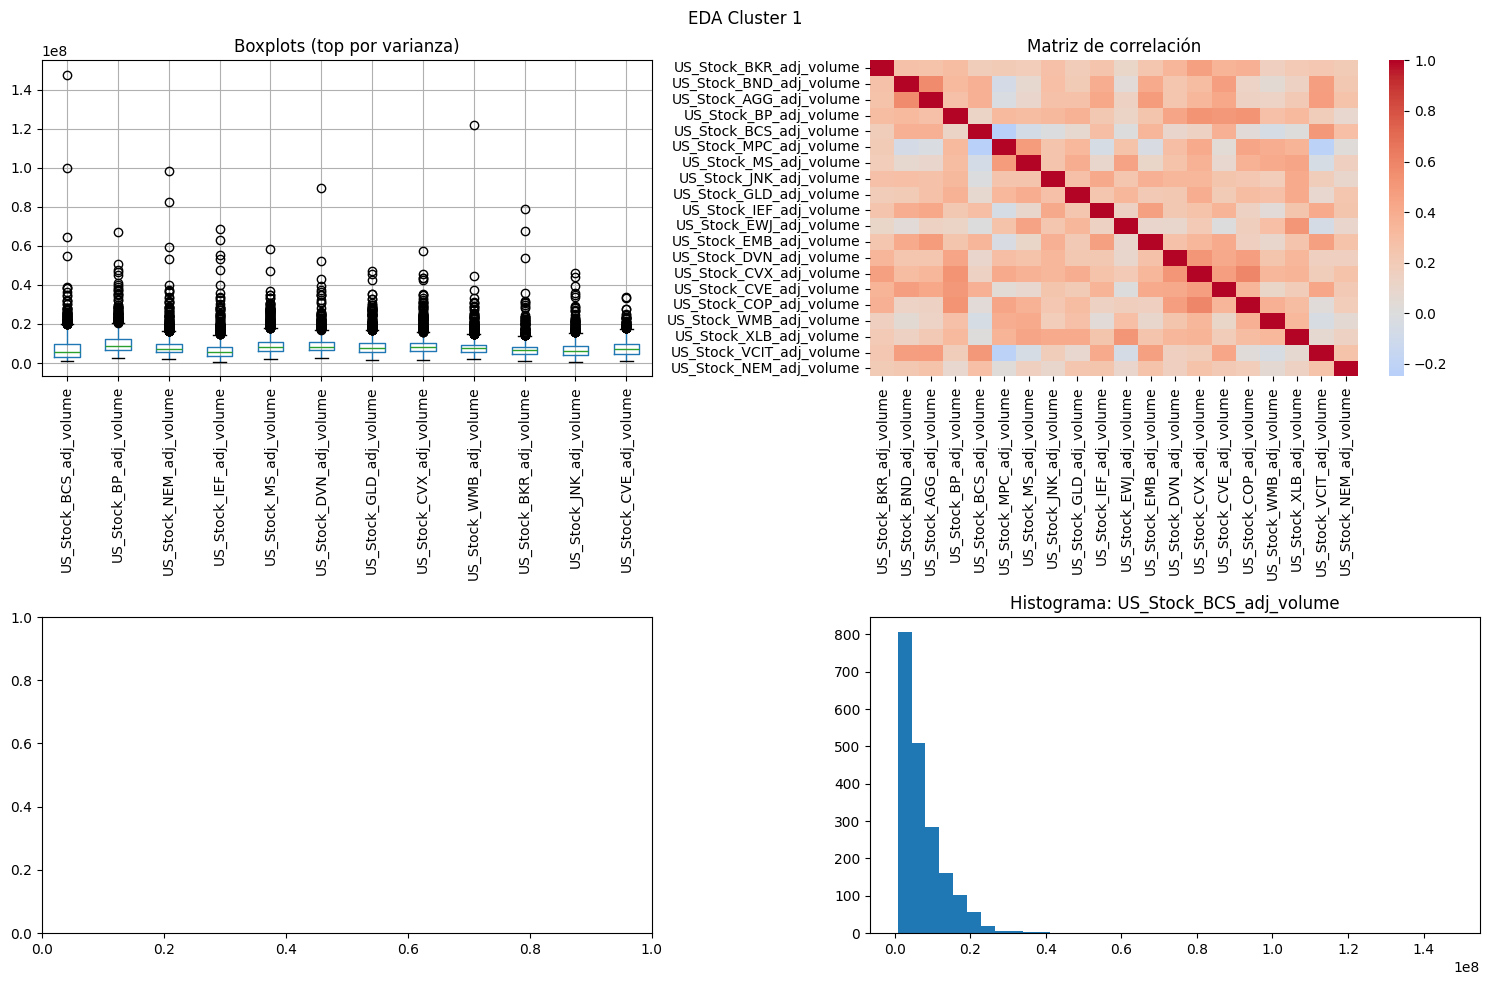


Volatilidad promedio (media de std por variable): 4243295.130858


{'desc':                            count          mean           std        min  \
 US_Stock_BKR_adj_volume   1961.0  7.167561e+06  4.281323e+06   958438.0   
 US_Stock_BND_adj_volume   1961.0  5.241654e+06  2.841465e+06   644471.0   
 US_Stock_AGG_adj_volume   1961.0  6.665400e+06  3.239024e+06  1324832.0   
 US_Stock_BP_adj_volume    1961.0  1.010052e+07  5.476147e+06  2348375.0   
 US_Stock_BCS_adj_volume   1961.0  7.581876e+06  7.028912e+06   827000.0   
 US_Stock_MPC_adj_volume   1961.0  5.350975e+06  3.225079e+06   965504.0   
 US_Stock_MS_adj_volume    1961.0  9.475343e+06  4.835788e+06  2087767.0   
 US_Stock_JNK_adj_volume   1961.0  7.011823e+06  4.279634e+06   661394.0   
 US_Stock_GLD_adj_volume   1961.0  8.626470e+06  4.588357e+06  1436508.0   
 US_Stock_IEF_adj_volume   1961.0  6.687539e+06  4.924899e+06   531238.0   
 US_Stock_EWJ_adj_volume   1961.0  6.992504e+06  3.884673e+06  1370435.0   
 US_Stock_EMB_adj_volume   1961.0  5.216754e+06  2.694054e+06   680069.0   
 US_

In [60]:
eda_cluster(df0, 1)

### Análisis Exploratorio Grupo 2

Análisis Exploratorio Grupo 2

Estadísticas descriptivas (numéricas):


,count,mean,std,min,25%,50%,75%,max
US_Stock_BKR_adj_volume,1961.0,7.167561e+06,4.281323e+06,958438.0,4748116.0,6510892.0,8438527.0,79090492.0
US_Stock_BND_adj_volume,1961.0,5.241654e+06,2.841465e+06,644471.0,3473338.0,4981493.0,6349599.0,33963335.0
US_Stock_AGG_adj_volume,1961.0,6.665400e+06,3.239024e+06,1324832.0,4465340.0,6243292.0,8162377.0,28390079.0
US_Stock_BP_adj_volume,1961.0,1.010052e+07,5.476147e+06,2348375.0,6550921.0,8930586.0,12180664.0,66996986.0
US_Stock_BCS_adj_volume,1961.0,7.581876e+06,7.028912e+06,827000.0,3185159.0,5605436.0,9867156.0,147611977.0
US_Stock_MPC_adj_volume,1961.0,5.350975e+06,3.225079e+06,965504.0,3156419.0,4775084.0,6556036.0,39153794.0
US_Stock_MS_adj_volume,1961.0,9.475343e+06,4.835788e+06,2087767.0,6412103.0,8414853.0,11007602.0,58533497.0
US_Stock_JNK_adj_volume,1961.0,7.011823e+06,4.279634e+06,661394.0,4066508.0,6178777.0,8680358.0,46175066.0
US_Stock_GLD_adj_volume,1961.0,8.626470e+06,4.588357e+06,1436508.0,5652091.0,7637880.0,10106940.0,47347678.0
US_Stock_IEF_adj_volume,1961.0,6.687539e+06,4.924899e+06,531238.0,3766926.0,5797640.0,8103627.0,68670638.0



Valores faltantes por variable (todas):


Series([], dtype: float64)


Outliers por IQR


US_Stock_COP_adj_volume    121
US_Stock_CVX_adj_volume    115
US_Stock_WMB_adj_volume    113
US_Stock_MS_adj_volume     111
US_Stock_EWJ_adj_volume    109
US_Stock_XLB_adj_volume    107
US_Stock_GLD_adj_volume    100
US_Stock_NEM_adj_volume     99
US_Stock_DVN_adj_volume     91
US_Stock_MPC_adj_volume     88
dtype: int64


Correlaciones altas (|r| > 0.7):


,var1,var2,corr,abs_corr


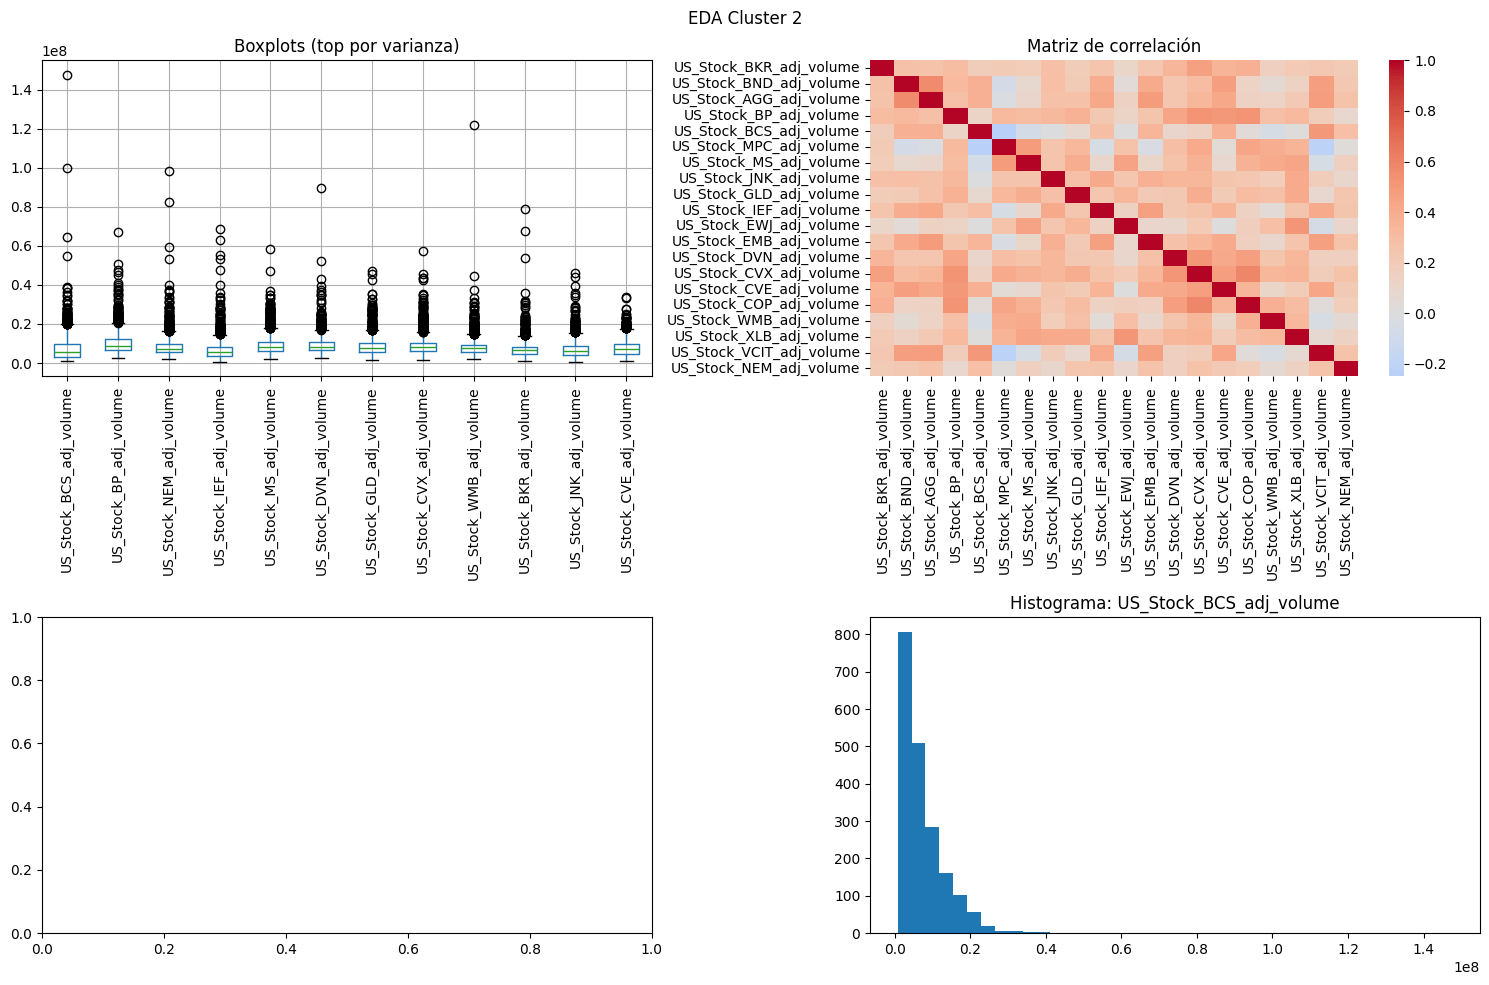


Volatilidad promedio (media de std por variable): 4243295.130858


{'desc':                            count          mean           std        min  \
 US_Stock_BKR_adj_volume   1961.0  7.167561e+06  4.281323e+06   958438.0   
 US_Stock_BND_adj_volume   1961.0  5.241654e+06  2.841465e+06   644471.0   
 US_Stock_AGG_adj_volume   1961.0  6.665400e+06  3.239024e+06  1324832.0   
 US_Stock_BP_adj_volume    1961.0  1.010052e+07  5.476147e+06  2348375.0   
 US_Stock_BCS_adj_volume   1961.0  7.581876e+06  7.028912e+06   827000.0   
 US_Stock_MPC_adj_volume   1961.0  5.350975e+06  3.225079e+06   965504.0   
 US_Stock_MS_adj_volume    1961.0  9.475343e+06  4.835788e+06  2087767.0   
 US_Stock_JNK_adj_volume   1961.0  7.011823e+06  4.279634e+06   661394.0   
 US_Stock_GLD_adj_volume   1961.0  8.626470e+06  4.588357e+06  1436508.0   
 US_Stock_IEF_adj_volume   1961.0  6.687539e+06  4.924899e+06   531238.0   
 US_Stock_EWJ_adj_volume   1961.0  6.992504e+06  3.884673e+06  1370435.0   
 US_Stock_EMB_adj_volume   1961.0  5.216754e+06  2.694054e+06   680069.0   
 US_

In [61]:
eda_cluster(df0, 2)

### Análisis Exploratorio Grupo 3

Análisis Exploratorio Grupo 3

Estadísticas descriptivas (numéricas):


,count,mean,std,min,25%,50%,75%,max
US_Stock_BKR_adj_volume,1961.0,7.167561e+06,4.281323e+06,958438.0,4748116.0,6510892.0,8438527.0,79090492.0
US_Stock_BND_adj_volume,1961.0,5.241654e+06,2.841465e+06,644471.0,3473338.0,4981493.0,6349599.0,33963335.0
US_Stock_AGG_adj_volume,1961.0,6.665400e+06,3.239024e+06,1324832.0,4465340.0,6243292.0,8162377.0,28390079.0
US_Stock_BP_adj_volume,1961.0,1.010052e+07,5.476147e+06,2348375.0,6550921.0,8930586.0,12180664.0,66996986.0
US_Stock_BCS_adj_volume,1961.0,7.581876e+06,7.028912e+06,827000.0,3185159.0,5605436.0,9867156.0,147611977.0
US_Stock_MPC_adj_volume,1961.0,5.350975e+06,3.225079e+06,965504.0,3156419.0,4775084.0,6556036.0,39153794.0
US_Stock_MS_adj_volume,1961.0,9.475343e+06,4.835788e+06,2087767.0,6412103.0,8414853.0,11007602.0,58533497.0
US_Stock_JNK_adj_volume,1961.0,7.011823e+06,4.279634e+06,661394.0,4066508.0,6178777.0,8680358.0,46175066.0
US_Stock_GLD_adj_volume,1961.0,8.626470e+06,4.588357e+06,1436508.0,5652091.0,7637880.0,10106940.0,47347678.0
US_Stock_IEF_adj_volume,1961.0,6.687539e+06,4.924899e+06,531238.0,3766926.0,5797640.0,8103627.0,68670638.0



Valores faltantes por variable (todas):


Series([], dtype: float64)


Outliers por IQR


US_Stock_COP_adj_volume    121
US_Stock_CVX_adj_volume    115
US_Stock_WMB_adj_volume    113
US_Stock_MS_adj_volume     111
US_Stock_EWJ_adj_volume    109
US_Stock_XLB_adj_volume    107
US_Stock_GLD_adj_volume    100
US_Stock_NEM_adj_volume     99
US_Stock_DVN_adj_volume     91
US_Stock_MPC_adj_volume     88
dtype: int64


Correlaciones altas (|r| > 0.7):


,var1,var2,corr,abs_corr


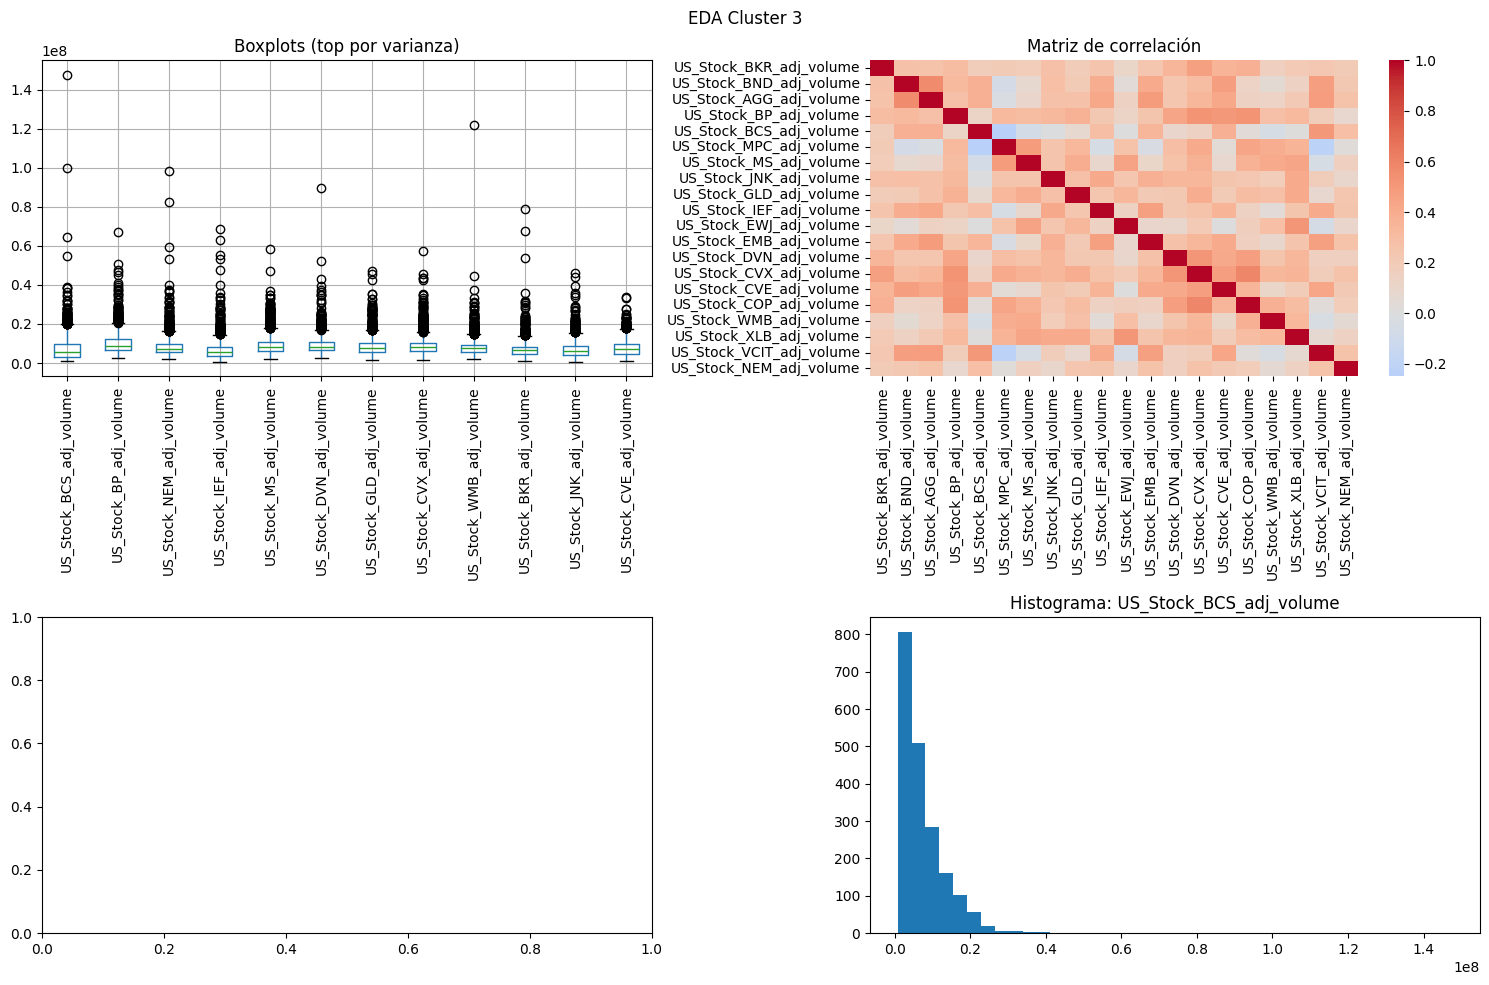


Volatilidad promedio (media de std por variable): 4243295.130858


{'desc':                            count          mean           std        min  \
 US_Stock_BKR_adj_volume   1961.0  7.167561e+06  4.281323e+06   958438.0   
 US_Stock_BND_adj_volume   1961.0  5.241654e+06  2.841465e+06   644471.0   
 US_Stock_AGG_adj_volume   1961.0  6.665400e+06  3.239024e+06  1324832.0   
 US_Stock_BP_adj_volume    1961.0  1.010052e+07  5.476147e+06  2348375.0   
 US_Stock_BCS_adj_volume   1961.0  7.581876e+06  7.028912e+06   827000.0   
 US_Stock_MPC_adj_volume   1961.0  5.350975e+06  3.225079e+06   965504.0   
 US_Stock_MS_adj_volume    1961.0  9.475343e+06  4.835788e+06  2087767.0   
 US_Stock_JNK_adj_volume   1961.0  7.011823e+06  4.279634e+06   661394.0   
 US_Stock_GLD_adj_volume   1961.0  8.626470e+06  4.588357e+06  1436508.0   
 US_Stock_IEF_adj_volume   1961.0  6.687539e+06  4.924899e+06   531238.0   
 US_Stock_EWJ_adj_volume   1961.0  6.992504e+06  3.884673e+06  1370435.0   
 US_Stock_EMB_adj_volume   1961.0  5.216754e+06  2.694054e+06   680069.0   
 US_

In [62]:
eda_cluster(df0, 3)

### Análisis Exploratorio Grupo 4

Análisis Exploratorio Grupo 4

Estadísticas descriptivas (numéricas):


,count,mean,std,min,25%,50%,75%,max
US_Stock_BKR_adj_volume,1961.0,7.167561e+06,4.281323e+06,958438.0,4748116.0,6510892.0,8438527.0,79090492.0
US_Stock_BND_adj_volume,1961.0,5.241654e+06,2.841465e+06,644471.0,3473338.0,4981493.0,6349599.0,33963335.0
US_Stock_AGG_adj_volume,1961.0,6.665400e+06,3.239024e+06,1324832.0,4465340.0,6243292.0,8162377.0,28390079.0
US_Stock_BP_adj_volume,1961.0,1.010052e+07,5.476147e+06,2348375.0,6550921.0,8930586.0,12180664.0,66996986.0
US_Stock_BCS_adj_volume,1961.0,7.581876e+06,7.028912e+06,827000.0,3185159.0,5605436.0,9867156.0,147611977.0
US_Stock_MPC_adj_volume,1961.0,5.350975e+06,3.225079e+06,965504.0,3156419.0,4775084.0,6556036.0,39153794.0
US_Stock_MS_adj_volume,1961.0,9.475343e+06,4.835788e+06,2087767.0,6412103.0,8414853.0,11007602.0,58533497.0
US_Stock_JNK_adj_volume,1961.0,7.011823e+06,4.279634e+06,661394.0,4066508.0,6178777.0,8680358.0,46175066.0
US_Stock_GLD_adj_volume,1961.0,8.626470e+06,4.588357e+06,1436508.0,5652091.0,7637880.0,10106940.0,47347678.0
US_Stock_IEF_adj_volume,1961.0,6.687539e+06,4.924899e+06,531238.0,3766926.0,5797640.0,8103627.0,68670638.0



Valores faltantes por variable (todas):


Series([], dtype: float64)


Outliers por IQR


US_Stock_COP_adj_volume    121
US_Stock_CVX_adj_volume    115
US_Stock_WMB_adj_volume    113
US_Stock_MS_adj_volume     111
US_Stock_EWJ_adj_volume    109
US_Stock_XLB_adj_volume    107
US_Stock_GLD_adj_volume    100
US_Stock_NEM_adj_volume     99
US_Stock_DVN_adj_volume     91
US_Stock_MPC_adj_volume     88
dtype: int64


Correlaciones altas (|r| > 0.7):


,var1,var2,corr,abs_corr


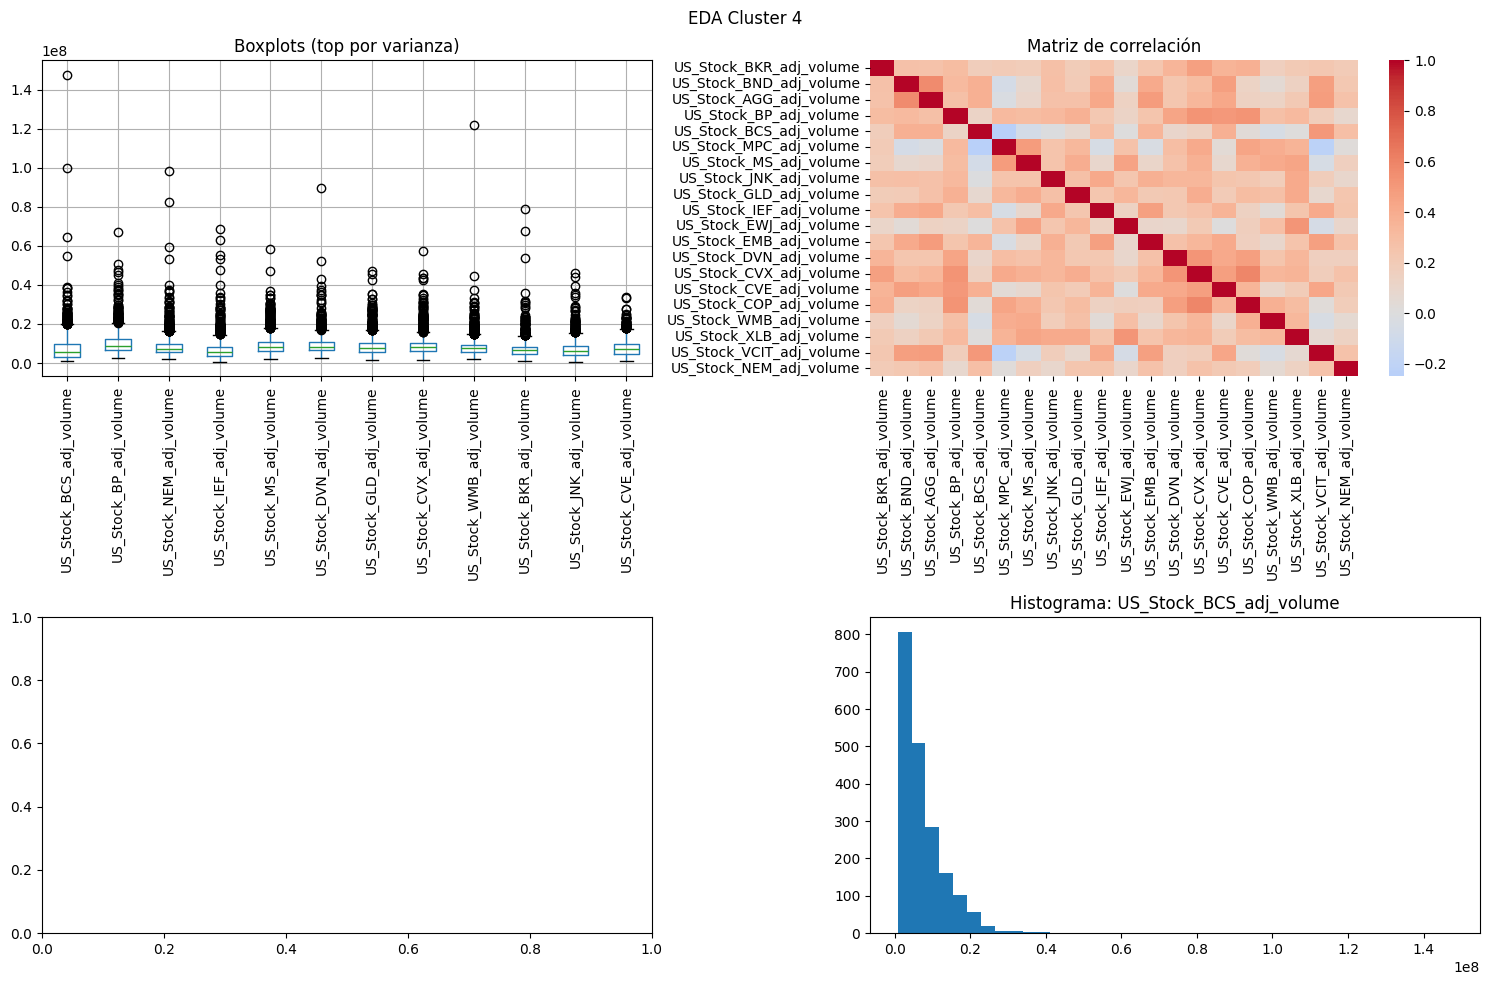


Volatilidad promedio (media de std por variable): 4243295.130858


{'desc':                            count          mean           std        min  \
 US_Stock_BKR_adj_volume   1961.0  7.167561e+06  4.281323e+06   958438.0   
 US_Stock_BND_adj_volume   1961.0  5.241654e+06  2.841465e+06   644471.0   
 US_Stock_AGG_adj_volume   1961.0  6.665400e+06  3.239024e+06  1324832.0   
 US_Stock_BP_adj_volume    1961.0  1.010052e+07  5.476147e+06  2348375.0   
 US_Stock_BCS_adj_volume   1961.0  7.581876e+06  7.028912e+06   827000.0   
 US_Stock_MPC_adj_volume   1961.0  5.350975e+06  3.225079e+06   965504.0   
 US_Stock_MS_adj_volume    1961.0  9.475343e+06  4.835788e+06  2087767.0   
 US_Stock_JNK_adj_volume   1961.0  7.011823e+06  4.279634e+06   661394.0   
 US_Stock_GLD_adj_volume   1961.0  8.626470e+06  4.588357e+06  1436508.0   
 US_Stock_IEF_adj_volume   1961.0  6.687539e+06  4.924899e+06   531238.0   
 US_Stock_EWJ_adj_volume   1961.0  6.992504e+06  3.884673e+06  1370435.0   
 US_Stock_EMB_adj_volume   1961.0  5.216754e+06  2.694054e+06   680069.0   
 US_

In [63]:
eda_cluster(df0, 4)

### Análisis Exploratorio Grupo 5

Análisis Exploratorio Grupo 5

Estadísticas descriptivas (numéricas):


,count,mean,std,min,25%,50%,75%,max
US_Stock_BKR_adj_volume,1961.0,7.167561e+06,4.281323e+06,958438.0,4748116.0,6510892.0,8438527.0,79090492.0
US_Stock_BND_adj_volume,1961.0,5.241654e+06,2.841465e+06,644471.0,3473338.0,4981493.0,6349599.0,33963335.0
US_Stock_AGG_adj_volume,1961.0,6.665400e+06,3.239024e+06,1324832.0,4465340.0,6243292.0,8162377.0,28390079.0
US_Stock_BP_adj_volume,1961.0,1.010052e+07,5.476147e+06,2348375.0,6550921.0,8930586.0,12180664.0,66996986.0
US_Stock_BCS_adj_volume,1961.0,7.581876e+06,7.028912e+06,827000.0,3185159.0,5605436.0,9867156.0,147611977.0
US_Stock_MPC_adj_volume,1961.0,5.350975e+06,3.225079e+06,965504.0,3156419.0,4775084.0,6556036.0,39153794.0
US_Stock_MS_adj_volume,1961.0,9.475343e+06,4.835788e+06,2087767.0,6412103.0,8414853.0,11007602.0,58533497.0
US_Stock_JNK_adj_volume,1961.0,7.011823e+06,4.279634e+06,661394.0,4066508.0,6178777.0,8680358.0,46175066.0
US_Stock_GLD_adj_volume,1961.0,8.626470e+06,4.588357e+06,1436508.0,5652091.0,7637880.0,10106940.0,47347678.0
US_Stock_IEF_adj_volume,1961.0,6.687539e+06,4.924899e+06,531238.0,3766926.0,5797640.0,8103627.0,68670638.0



Valores faltantes por variable (todas):


Series([], dtype: float64)


Outliers por IQR


US_Stock_COP_adj_volume    121
US_Stock_CVX_adj_volume    115
US_Stock_WMB_adj_volume    113
US_Stock_MS_adj_volume     111
US_Stock_EWJ_adj_volume    109
US_Stock_XLB_adj_volume    107
US_Stock_GLD_adj_volume    100
US_Stock_NEM_adj_volume     99
US_Stock_DVN_adj_volume     91
US_Stock_MPC_adj_volume     88
dtype: int64


Correlaciones altas (|r| > 0.7):


,var1,var2,corr,abs_corr


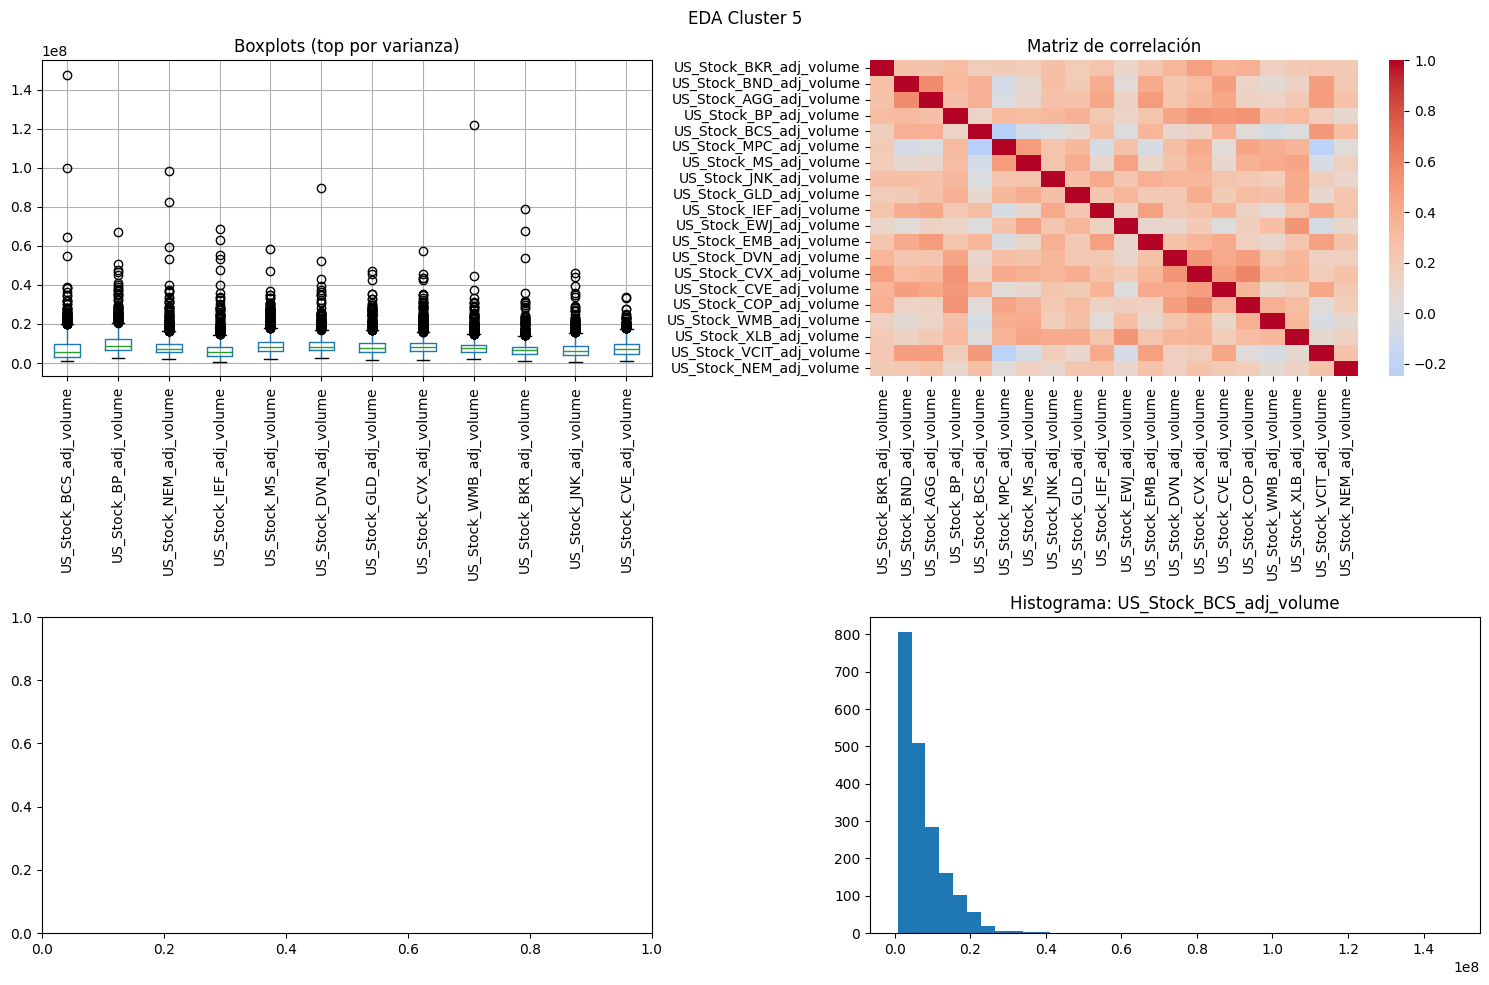


Volatilidad promedio (media de std por variable): 4243295.130858


{'desc':                            count          mean           std        min  \
 US_Stock_BKR_adj_volume   1961.0  7.167561e+06  4.281323e+06   958438.0   
 US_Stock_BND_adj_volume   1961.0  5.241654e+06  2.841465e+06   644471.0   
 US_Stock_AGG_adj_volume   1961.0  6.665400e+06  3.239024e+06  1324832.0   
 US_Stock_BP_adj_volume    1961.0  1.010052e+07  5.476147e+06  2348375.0   
 US_Stock_BCS_adj_volume   1961.0  7.581876e+06  7.028912e+06   827000.0   
 US_Stock_MPC_adj_volume   1961.0  5.350975e+06  3.225079e+06   965504.0   
 US_Stock_MS_adj_volume    1961.0  9.475343e+06  4.835788e+06  2087767.0   
 US_Stock_JNK_adj_volume   1961.0  7.011823e+06  4.279634e+06   661394.0   
 US_Stock_GLD_adj_volume   1961.0  8.626470e+06  4.588357e+06  1436508.0   
 US_Stock_IEF_adj_volume   1961.0  6.687539e+06  4.924899e+06   531238.0   
 US_Stock_EWJ_adj_volume   1961.0  6.992504e+06  3.884673e+06  1370435.0   
 US_Stock_EMB_adj_volume   1961.0  5.216754e+06  2.694054e+06   680069.0   
 US_

In [64]:
eda_cluster(df0, 5)